In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных


**Качество красного вина**

Набор данных относятся к красному варианту португальского вина «Vinho Verde».

Входные параметры (на основе физико-химических тестов):

1  fixed acidity - фиксированная кислотность

2  volatile acidity - летучая кислотность

3  citric acid - лимонная кислота

4  residual sugar - остаточный сахар

5  chlorides - хлориды

6  free sulfur dioxide- свободный диоксид серы

7  total sulfur dioxide- общий диоксид серы

8  density- плотность

9  рН - кислотность

10 sulphates- сульфаты

11 alcohol- спирт

Выходная переменная (на основе сенсорных данных):

12 quality - качество (оценка от 0 до 10)


**1. Чтение данных**

In [2]:
url = "https://raw.githubusercontent.com/Juliaaa-png/Machine-learning/main/winequality-red.csv" 
data_raw = pd.read_csv(url)

In [3]:
data_raw.shape


(1599, 12)

In [4]:
data_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**2. Визуализация данных и вычисление основных характеристик**

In [6]:
data_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data_raw['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Распределение целевой переменной не сбалансировано:

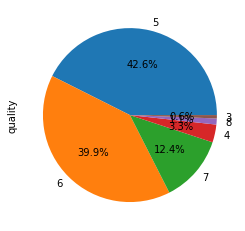

In [ ]:
data_raw.quality.value_counts().plot.pie(autopct='%1.1f%%')
pass

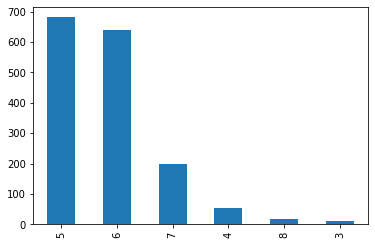

In [7]:
data_raw.quality.value_counts().plot.bar()
pass

**Корреляция**

In [45]:
data_raw.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.262761,0.675969,0.133321,0.096674,-0.145412,-0.107969,0.662222,-0.680958,0.182838,-0.050899,0.119016
volatile acidity,-0.262761,1.000000,-0.557928,0.023954,0.070724,-0.013596,0.083086,0.020470,0.235076,-0.273346,-0.205992,-0.388755
citric acid,0.675969,-0.557928,1.000000,0.122736,0.179290,-0.070261,0.013654,0.357977,-0.536593,0.305618,0.117628,0.225179
residual sugar,0.133321,0.023954,0.122736,1.000000,0.068472,0.158953,0.160010,0.380896,-0.077732,0.015848,0.036524,-0.000468
chlorides,0.096674,0.070724,0.179290,0.068472,1.000000,0.003900,0.056982,0.200994,-0.250423,0.321198,-0.222700,-0.118796
free sulfur dioxide,-0.145412,-0.013596,-0.070261,0.158953,0.003900,1.000000,0.665213,-0.018479,0.070941,0.055658,-0.073973,-0.051857
total sulfur dioxide,-0.107969,0.083086,0.013654,0.160010,0.056982,0.665213,1.000000,0.095274,-0.063735,0.051093,-0.241946,-0.211422
density,0.662222,0.020470,0.357977,0.380896,0.200994,-0.018479,0.095274,1.000000,-0.326110,0.136646,-0.497726,-0.184018
pH,-0.680958,0.235076,-0.536593,-0.077732,-0.250423,0.070941,-0.063735,-0.326110,1.000000,-0.177153,0.185827,-0.052944
sulphates,0.182838,-0.273346,0.305618,0.015848,0.321198,0.055658,0.051093,0.136646,-0.177153,1.000000,0.115910,0.273316


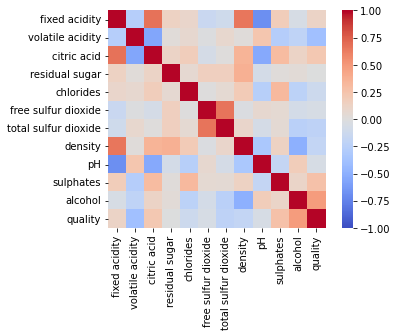

In [46]:
sns.heatmap(data_raw.corr(), square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

**Обработка выбросов**


Построим для каждого признака диаграммы и рассмотрим, есть ли выбросы:

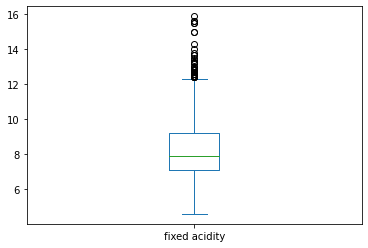

In [9]:
data_raw['fixed acidity'].plot(kind='box')
pass

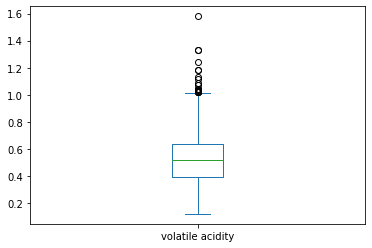

In [10]:
data_raw['volatile acidity'].plot(kind='box')
pass

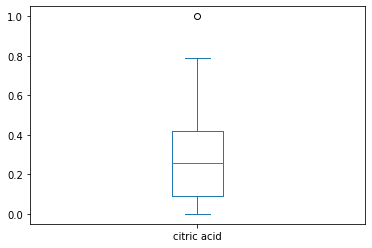

In [11]:
data_raw['citric acid'].plot(kind='box')
pass

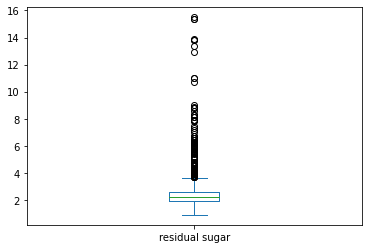

In [12]:
data_raw['residual sugar'].plot(kind='box')
pass

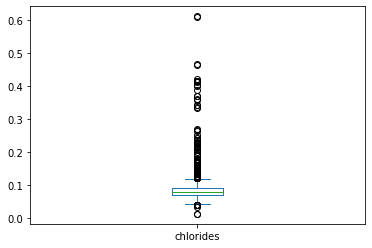

In [ ]:
data_raw['chlorides'].plot(kind='box')
pass

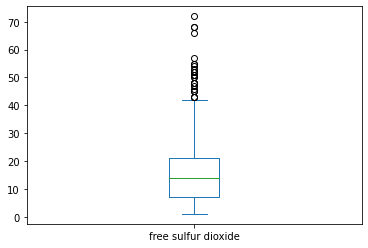

In [13]:
data_raw['free sulfur dioxide'].plot(kind='box')
pass

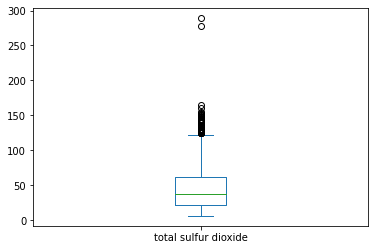

In [ ]:
data_raw['total sulfur dioxide'].plot(kind='box')
pass

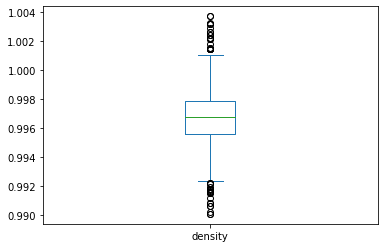

In [14]:
data_raw['density'].plot(kind='box')
pass

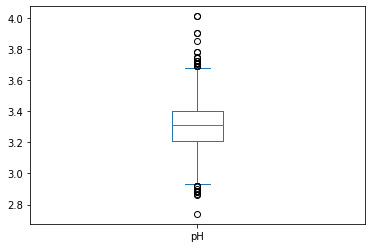

In [15]:
data_raw['pH'].plot(kind='box')
pass

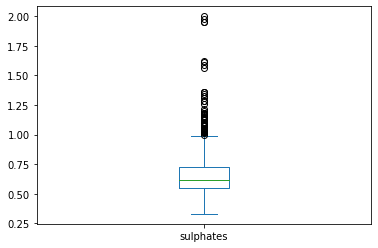

In [16]:
data_raw['sulphates'].plot(kind='box')
pass

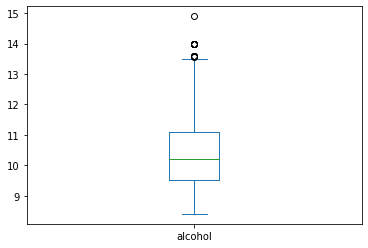

In [17]:
data_raw['alcohol'].plot(kind='box')
pass

Из приведенных графиков мы видим что большое кол-во выбросов характерно для признаков 'citric acid', 'pH', 'total sulfur dioxide'

** Обработка пропущенных значений (или убедиться, что их нет)**

In [19]:
data_raw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Пропущенных значений не обнаружено

Обработаем выбросы для признаков  'citric acid', 'pH', 'total sulfur dioxide'

In [20]:
data_raw['citric acid'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0000
0.010    0.0000
0.050    0.0000
0.100    0.0100
0.500    0.2600
0.900    0.5220
0.950    0.6000
0.990    0.7002
0.995    0.7400
Name: citric acid, dtype: float64

In [21]:
data_raw['pH'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    2.8900
0.010    2.9300
0.050    3.0600
0.100    3.1200
0.500    3.3100
0.900    3.5100
0.950    3.5700
0.990    3.7002
0.995    3.7401
Name: pH, dtype: float64

In [22]:
data_raw[ 'total sulfur dioxide'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      8.0
0.010      8.0
0.050     11.0
0.100     14.0
0.500     38.0
0.900     93.2
0.950    112.1
0.990    145.0
0.995    151.0
Name: total sulfur dioxide, dtype: float64

In [23]:
rows_to_drop = data_raw[
    (data_raw['citric acid'] < data_raw['citric acid'].quantile(0.005)) | (data_raw['citric acid'] > data_raw['citric acid'].quantile(0.995)) | 
    (data_raw['pH']  < data_raw['pH'].quantile(0.005)) | (data_raw['pH']  > data_raw['pH'].quantile(0.995)) |
    (data_raw['total sulfur dioxide']  < data_raw['total sulfur dioxide'].quantile(0.005)) | (data_raw['total sulfur dioxide']  > data_raw['total sulfur dioxide'].quantile(0.995))].index
data_raw = data_raw.drop(rows_to_drop)
print(data_raw.shape)

(1566, 12)


**Обработка категориальных признаков**

В данном датасете таких нет.

**Нормализация количественных признаков**

In [29]:
numerics = data_raw.select_dtypes(include='float64')
numerics_stand = (numerics - numerics.mean(axis = 0)) / numerics.std(axis = 0)
numerics_stand.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.566000e+03,1.566000e+03,1.566000e+03,1.566000e+03,1.566000e+03,1.566000e+03,1.566000e+03,1.566000e+03,1.566000e+03,1.566000e+03,1.566000e+03
mean,-4.355818e-16,4.038206e-16,1.542685e-16,-1.542685e-16,-1.814924e-16,-2.722386e-17,-3.629848e-17,-7.985665e-15,-1.070805e-15,3.176117e-16,1.996416e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.007650e+00,-2.288019e+00,-1.402538e+00,-1.206098e+00,-1.722762e+00,-1.437576e+00,-1.211758e+00,-3.610496e+00,-2.867120e+00,-1.979296e+00,-1.905510e+00
25%,-7.136132e-01,-7.737277e-01,-9.318194e-01,-4.633732e-01,-3.906968e-01,-8.552450e-01,-7.639287e-01,-6.150556e-01,-6.889068e-01,-6.500424e-01,-8.602994e-01
50%,-2.430544e-01,-4.462436e-02,-4.268334e-02,-2.405557e-01,-1.839971e-01,-1.758584e-01,-2.681176e-01,-5.173168e-03,-8.215243e-03,-2.270982e-01,-2.901846e-01
75%,5.216036e-01,6.283941e-01,7.941506e-01,5.653438e-02,6.863592e-02,5.035282e-01,5.155840e-01,5.777233e-01,6.044072e-01,4.375286e-01,5.649877e-01
max,4.462533e+00,5.900372e+00,2.467818e+00,9.637689e+00,8.727058e+00,5.065124e+00,3.362500e+00,3.740476e+00,2.918758e+00,7.990105e+00,4.270734e+00


**Разбиение данных на обучающую и тестовую выборки**

In [33]:
X = data_raw.drop(['quality'], axis=1)
y = data_raw['quality']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(1174, 392)

**Обучение**

Для обучения применим Метод 𝑘 ближайших соседей ( 𝑘 NN, 𝑘 nearest neighbours)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [36]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

In [37]:
err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table = pd.DataFrame(columns=('train', 'test'))
err_table.loc['kNN, 10 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.408859,0.469388


In [38]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN, 7 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.408859,0.469388
"kNN, 7 elements",0.386712,0.507653


In [39]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN, 15 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.408859,0.469388
"kNN, 7 elements",0.386712,0.507653
"kNN, 15 elements",0.427598,0.484694


In [40]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN,5 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.408859,0.469388
"kNN, 7 elements",0.386712,0.507653
"kNN, 15 elements",0.427598,0.484694
"kNN,5 elements",0.342419,0.520408


In [41]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN,1 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.408859,0.469388
"kNN, 7 elements",0.386712,0.507653
"kNN, 15 elements",0.427598,0.484694
"kNN,5 elements",0.342419,0.520408
"kNN,1 elements",0.0,0.395408


In [42]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN,6 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.408859,0.469388
"kNN, 7 elements",0.386712,0.507653
"kNN, 15 elements",0.427598,0.484694
"kNN,5 elements",0.342419,0.520408
"kNN,1 elements",0.0,0.395408
"kNN,6 elements",0.373083,0.507653


In [43]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN,7 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.408859,0.469388
"kNN, 7 elements",0.386712,0.507653
"kNN, 15 elements",0.427598,0.484694
"kNN,5 elements",0.342419,0.520408
"kNN,1 elements",0.0,0.395408
"kNN,6 elements",0.373083,0.507653
"kNN,7 elements",0.386712,0.507653


In [44]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN,13 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.408859,0.469388
"kNN, 7 elements",0.386712,0.507653
"kNN, 15 elements",0.427598,0.484694
"kNN,5 elements",0.342419,0.520408
"kNN,1 elements",0.0,0.395408
"kNN,6 elements",0.373083,0.507653
"kNN,7 elements",0.386712,0.507653
"kNN,13 elements",0.434412,0.510204




**Вывод**: Сравнивая результаты обучения видно, что лучшими значениями параметра являются 15 и 10, причем разница между ними совсем маленькая и точный параметр определить нельзя. 

Значение ошибки довольно мало, подготовка и обучение датасета прошли успешно.

